In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [47]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)


Use `least_squares` to compute w, and visualize the results.

In [48]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # w = least squares with respect to tx and y
    raise NotImplementedError

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

NotImplementedError: 

## Logistic Regression

Compute negative log likelihood loss.

In [49]:
def sigmoid(t):
    """apply the sigmoid function on t."""
    sigmoid = 1/(1 +np.exp(-t)) 
    return sigmoid


In [50]:
def calculate_loss(y, tx, w):
    """compute the loss: negative log likelihood."""
    
    sig = sigmoid(tx.dot(w))
    cost =  - (1-y).T.dot(np.log(1-sig)) - y.T.dot(np.log(sig))
    return cost
    

In [51]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    return tx.T.dot(sigmoid(tx.dot(w)) -y)
                               
    

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [52]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the loss: TODO
    # ***************************************************
    loss = calculate_loss(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the gradient: TODO
    # ***************************************************
    grad = calculate_gradient(y,tx,w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w = w- gamma * grad
    
    return loss, w

Demo!

Current iteration=0, loss=[[138.62943611]]
Current iteration=100, loss=[[43.46403231]]
Current iteration=200, loss=[[41.54589281]]
Current iteration=300, loss=[[41.09863897]]
Current iteration=400, loss=[[40.96487064]]
Current iteration=500, loss=[[40.92008946]]
Current iteration=600, loss=[[40.90418744]]
Current iteration=700, loss=[[40.89834995]]
Current iteration=800, loss=[[40.89616497]]
Current iteration=900, loss=[[40.89533753]]
Current iteration=1000, loss=[[40.89502196]]
Current iteration=1100, loss=[[40.89490109]]
Current iteration=1200, loss=[[40.89485466]]
Current iteration=1300, loss=[[40.8948368]]
Current iteration=1400, loss=[[40.89482992]]
Current iteration=1500, loss=[[40.89482727]]
loss=[[40.89482664]]


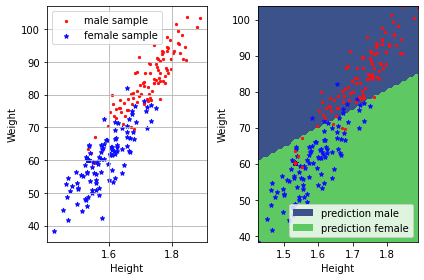

In [53]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))
    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your Hessian below

In [54]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate Hessian: TODO
    # ***************************************************
    raise NotImplementedError

Write a function below to return loss, gradient, and Hessian.

In [55]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and Hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and Hessian: TODO
    # ***************************************************
    raise NotImplementedError

### Using Newton's method
Use Newton's method for logistic regression.

In [56]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and Hessian: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    raise NotImplementedError
    return loss, w

demo

In [57]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1.
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

NotImplementedError: 

### Using penalized logistic regression (first-order, no Newton)
Fill in the function below.

In [58]:
def penalized_logistic_regression(y, tx, w, lambda_):
    num_samples = y.shape[0]
    print(w.T.dot(w))
    loss = calculate_loss(y, tx, w) + lambda_ * np.squeeze(w.T.dot(w))
    gradient = calculate_gradient(y, tx, w) + 2 * lambda_ * w
    return loss, gradient

In [59]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
    w -= gamma * gradient
    return loss, w

[[0.]]
Current iteration=0, loss=[[138.62943611]]
[[1.10682507]]
[[1.7875834]]
[[2.31602504]]
[[2.75321581]]
[[3.12829873]]
[[3.45833107]]
[[3.75441826]]
[[4.0242871]]
[[4.27356251]]
[[4.50647459]]
[[4.72628225]]
[[4.93554256]]
[[5.13629025]]
[[5.3301619]]
[[5.51848467]]
[[5.70234129]]
[[5.88261886]]
[[6.06004609]]
[[6.23522228]]
[[6.40864017]]
[[6.58070418]]
[[6.75174515]]
[[6.92203236]]
[[7.09178342]]
[[7.26117249]]
[[7.43033708]]
[[7.59938381]]
[[7.76839322]]
[[7.93742392]]
[[8.10651599]]
[[8.27569401]]
[[8.44496954]]
[[8.6143433]]
[[8.78380705]]
[[8.95334512]]
[[9.12293583]]
[[9.29255261]]
[[9.46216503]]
[[9.63173966]]
[[9.80124077]]
[[9.97063101]]
[[10.13987187]]
[[10.30892421]]
[[10.47774858]]
[[10.64630559]]
[[10.81455612]]
[[10.98246161]]
[[11.14998423]]
[[11.31708698]]
[[11.48373387]]
[[11.64988999]]
[[11.81552161]]
[[11.98059619]]
[[12.14508247]]
[[12.30895046]]
[[12.47217148]]
[[12.63471813]]
[[12.79656434]]
[[12.95768532]]
[[13.11805754]]
[[13.27765874]]
[[13.43646789]]
[[1

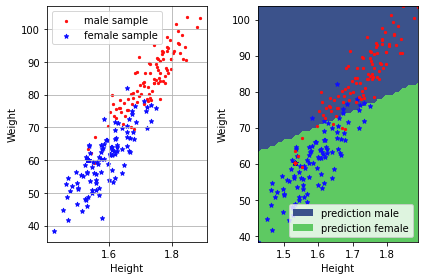

In [60]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)

In [ ]:
x = np.array([[[0], [1], [2]]])
print(np.squeeze(x))
      